In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
import pandas as pd

# Escape backslashes in the file path
file_path = 'C:\\Users\\Arzoo\\Desktop\\Project # 3 06-24\\Project-3\\data\\social_media.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(df.head())

#df = pd.read_csv("./social_media.csv")

      Date  Facebook  Pinterest  Twitter  StumbleUpon  YouTube  Instagram  \
0  2009-04     20.16        0.0     6.86        36.79      0.0        0.0   
1  2009-05     24.30        0.0     9.95        33.78      0.0        0.0   
2  2009-06     26.48        0.0    10.56        29.65      0.0        0.0   
3  2009-07     29.10        0.0    10.35        33.55      0.0        0.0   
4  2009-08     34.25        0.0    11.15        29.01      0.0        0.0   

   Tumblr  reddit  VKontakte  ...  MySpace  Fark  NowPublic  iWiW  \
0     0.0    8.98        0.0  ...    14.81  0.22       0.04  0.29   
1     0.0    7.62        0.0  ...     8.95  0.44       0.05  2.10   
2     0.0   12.13        0.0  ...     7.66  0.66       0.05  2.35   
3     0.0    9.52        0.0  ...     5.49  0.22       0.03  2.21   
4     0.0    9.37        0.0  ...     4.69  0.40       0.08  2.27   

   news.ycombinator.com  Delicious  orkut  Odnoklassniki  Vimeo  Other  
0                  0.08       0.49   1.75        

In [3]:
df.index = pd.to_datetime(df["Date"],format="%Y-%m")

In [4]:
df.index = df.index.to_period("M")

In [5]:
df = df.drop(columns = "Date")

In [6]:
df = df.sort_index()

In [7]:
start_date = df.index[0]
end_date = df.index[-1]

In [8]:
start_date
# end_date

Period('2009-03', 'M')

In [9]:
market_date = yf.download("SPY",start="2008-03-01",end="2023-12-01", interval="1mo")[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [10]:
market_date.index = market_date.index.to_period("M")

In [11]:
market_date.head()

,Adj Close
Date,
2008-03,96.534309
2008-04,101.636086
2008-05,103.172417
2008-06,94.079155
2008-07,93.700081


In [12]:
market_returns = market_date.pct_change()

In [13]:
market_returns

,Adj Close
Date,
2008-03,NaN
2008-04,0.052849
2008-05,0.015116
2008-06,-0.088137
2008-07,-0.004029
...,...
2023-07,0.036569
2023-08,-0.016252
2023-09,-0.050783


In [14]:
market_returns["volatility"] = market_returns["Adj Close"].rolling(window=12).std()

In [15]:
market_returns[:14]

,Adj Close,volatility
Date,,
2008-03,NaN,NaN
2008-04,0.052849,NaN
2008-05,0.015116,NaN
2008-06,-0.088137,NaN
2008-07,-0.004029,NaN
2008-08,0.015454,NaN
2008-09,-0.099386,NaN
2008-10,-0.160355,NaN
2008-11,-0.069607,NaN


In [16]:
market_volaitlity = market_returns.dropna()

<Axes: xlabel='Date'>

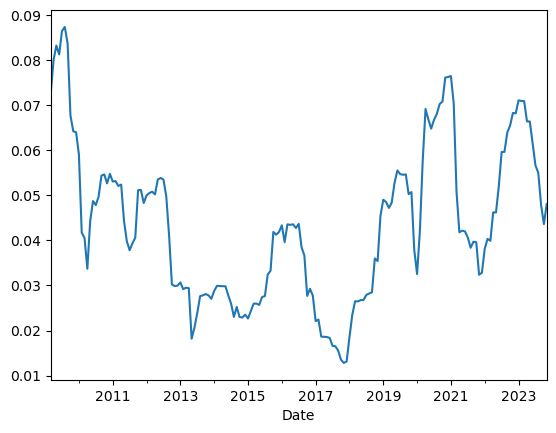

In [17]:
market_volaitlity["volatility"].plot()

In [18]:
combined_data = pd.concat([df,market_volaitlity], axis="columns", join="inner")

In [19]:
combined_data.head()

,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,LinkedIn,...,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other,Adj Close,volatility
Date,,,,,,,,,,,,,,,,,,,,,
2009-03,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.075611,0.072596
2009-04,20.16,0.0,6.86,36.79,0.0,0.0,0.0,8.98,0.0,0.00,...,0.04,0.29,0.08,0.49,1.75,0.0,0.0,2.83,0.107215,0.080023
2009-05,24.30,0.0,9.95,33.78,0.0,0.0,0.0,7.62,0.0,0.28,...,0.05,2.10,0.12,0.57,1.77,0.0,0.0,2.72,0.058453,0.083274
2009-06,26.48,0.0,10.56,29.65,0.0,0.0,0.0,12.13,0.0,0.49,...,0.05,2.35,0.11,0.58,1.46,0.0,0.0,1.93,-0.006268,0.081298
2009-07,29.10,0.0,10.35,33.55,0.0,0.0,0.0,9.52,0.0,0.41,...,0.03,2.21,0.14,0.55,1.24,0.0,0.0,1.84,0.080676,0.086505


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

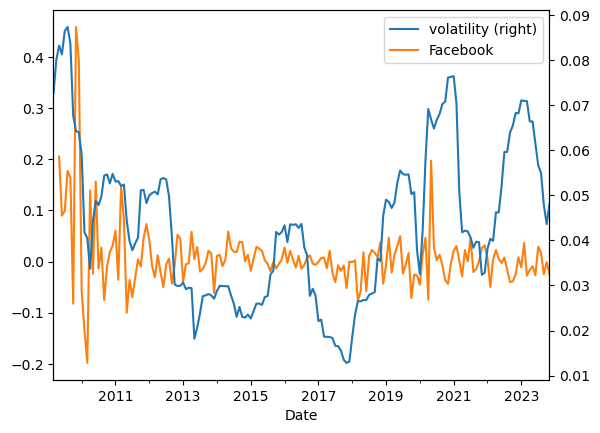

In [21]:
combined_data.volatility.plot(secondary_y=True , legend = True)
combined_data.Facebook.pct_change().plot(legend = True)

In [22]:
np.correlate(combined_data.volatility[1:], combined_data.Facebook.pct_change().dropna())

array([inf])

In [23]:
custom_analysis = combined_data[["Facebook"]].pct_change()

In [24]:
custom_analysis["volatility"] = combined_data.volatility

In [25]:
custom_analysis = custom_analysis.dropna()

In [26]:
custom_analysis.corr()

,Facebook,volatility
Facebook,1.000000,0.240723
volatility,0.240723,1.000000


In [27]:
corr_mat = combined_data.corr()

In [28]:
import seaborn as sns

In [29]:
corr_mat = combined_data.corr()

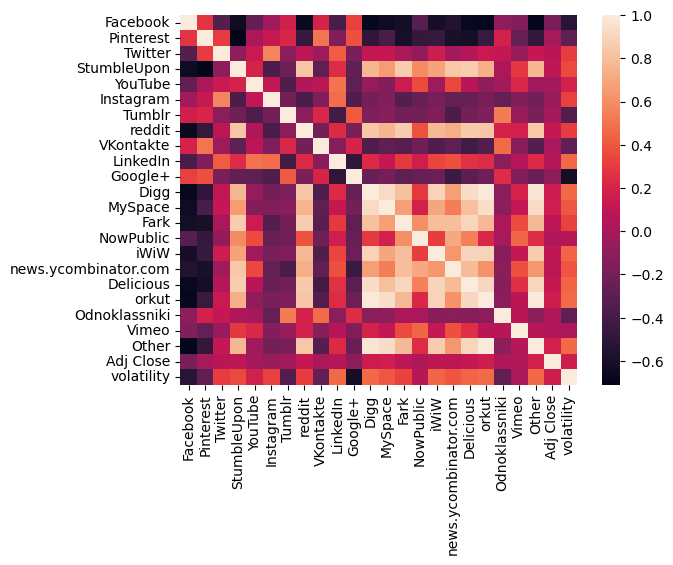

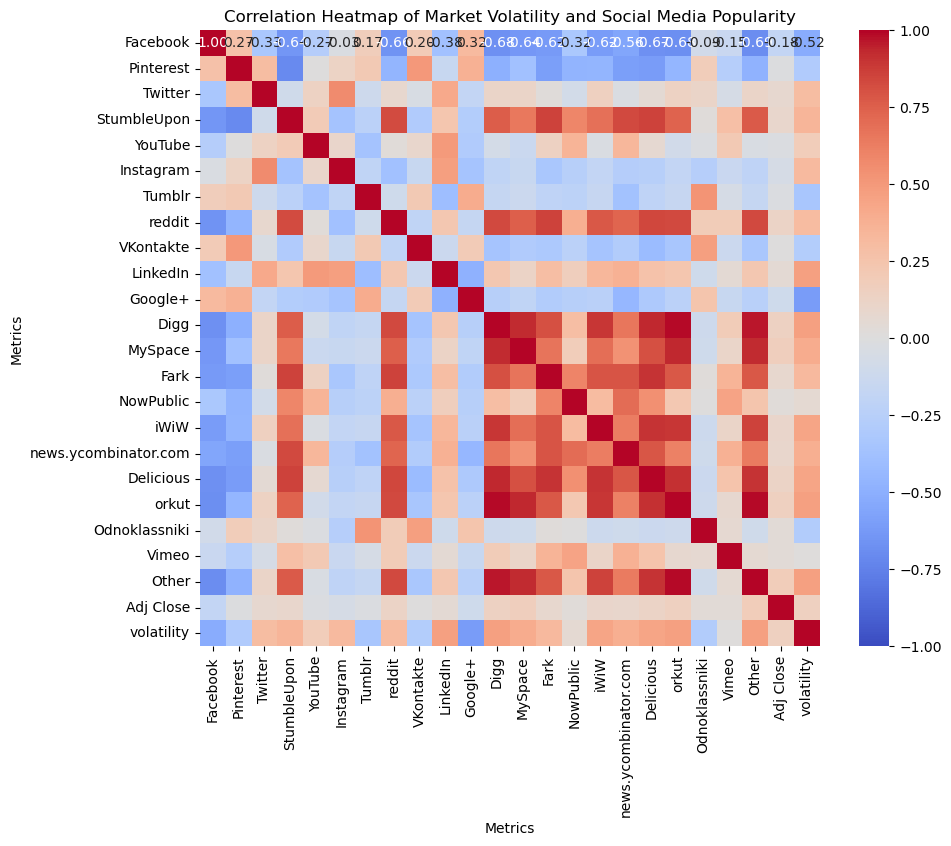

In [30]:
import seaborn as sns
corr_mat = combined_data.corr()
sns.heatmap(corr_mat)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)
plt.title('Correlation Heatmap of Market Volatility and Social Media Popularity')
plt.xlabel('Metrics')
plt.ylabel('Metrics')
plt.show()

In [31]:
subset =["Facebook", "YouTube","volatility"]

In [32]:
sub_set_corr = corr_mat.loc[subset, subset]

<Axes: >

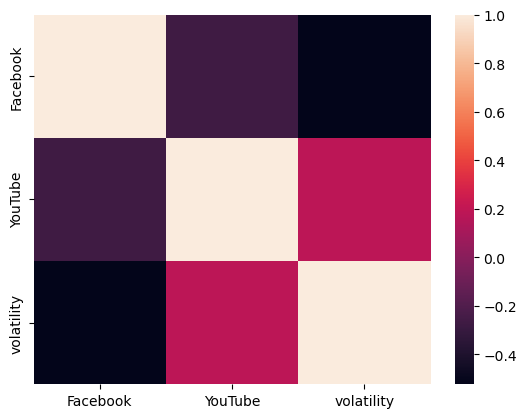

In [33]:
sns.heatmap(sub_set_corr)

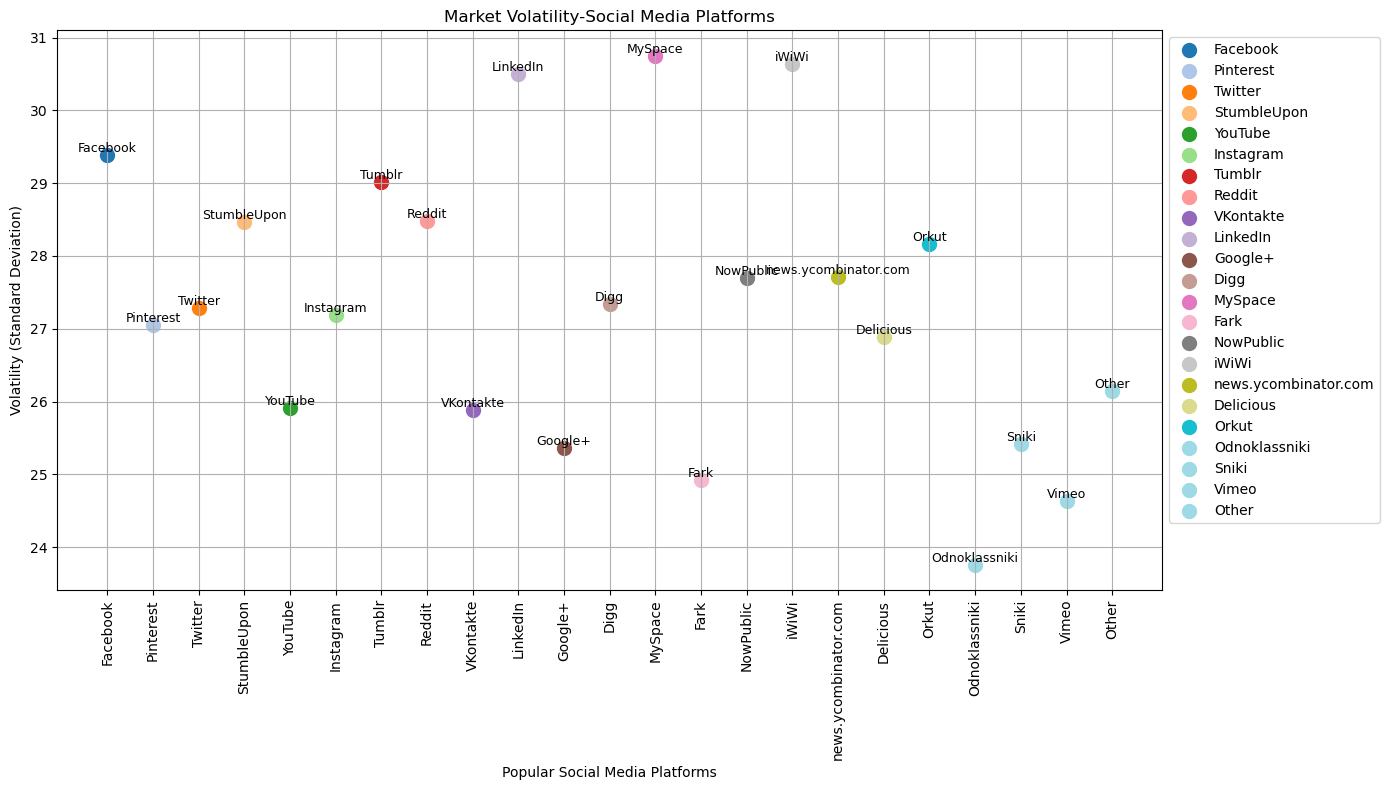

<Figure size 640x480 with 0 Axes>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data loading code)
# Creating example data for illustration
platforms = [
    'Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'YouTube', 'Instagram',
    'Tumblr', 'Reddit', 'VKontakte', 'LinkedIn', 'Google+', 'Digg', 'MySpace',
    'Fark', 'NowPublic', 'iWiWi', 'news.ycombinator.com', 'Delicious', 'Orkut',
    'Odnoklassniki', 'Sniki', 'Vimeo', 'Other'
]
num_platforms = len(platforms)
market_shares = [
    np.random.randint(1, 100, 50) for _ in range(num_platforms)
]

# Calculate volatility (standard deviation) for each platform
volatilities = [np.std(ms) for ms in market_shares]

# Using a colormap to generate markers dynamically
markers = [plt.cm.tab20(i) for i in range(num_platforms)]

# Plotting
plt.figure(figsize=(14, 8))
for i, platform in enumerate(platforms):
    plt.scatter(platform, volatilities[i], color=markers[i], marker='o', s=100, label=platform)
    plt.text(platform, volatilities[i], platform, fontsize=9, ha='center', va='bottom')

plt.title('Market Volatility-Social Media Platforms')
plt.xlabel('Popular Social Media Platforms')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()
plt.savefig('example_plot.png')  # Save as PNG file

In [49]:
plt.savefig('example_plot.png')  # Save as PNG file

<Figure size 640x480 with 0 Axes>

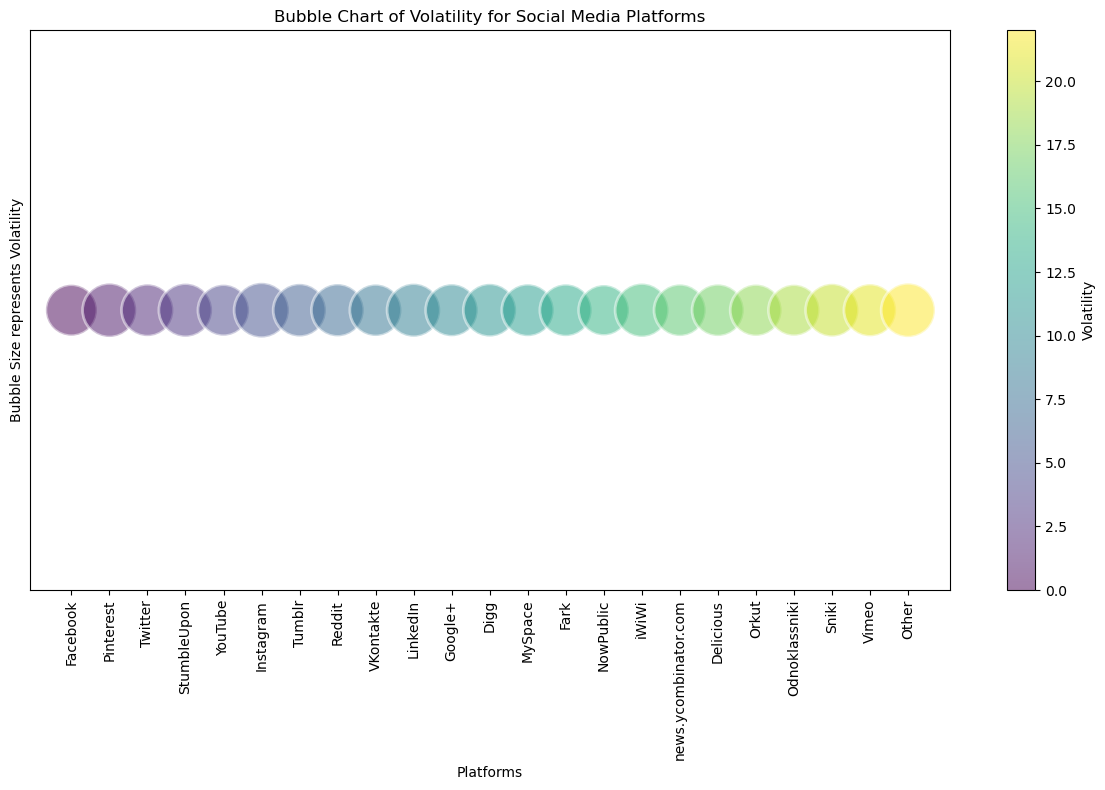

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data loading code)
platforms = [
    'Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'YouTube', 'Instagram',
    'Tumblr', 'Reddit', 'VKontakte', 'LinkedIn', 'Google+', 'Digg', 'MySpace',
    'Fark', 'NowPublic', 'iWiWi', 'news.ycombinator.com', 'Delicious', 'Orkut',
    'Odnoklassniki', 'Sniki', 'Vimeo', 'Other'
]
num_platforms = len(platforms)
market_shares = [
    np.random.randint(1, 100, 50) for _ in range(num_platforms)
]

# Calculate volatility (standard deviation) for each platform
volatilities = [np.std(ms) for ms in market_shares]

# Create a scatter plot with bubble sizes representing volatility
plt.figure(figsize=(12, 8))
plt.scatter(platforms, [1] * num_platforms, s=[vol * 50 for vol in volatilities], alpha=0.5, c=range(num_platforms), cmap='viridis', edgecolors='w', linewidth=2)

# Add labels and title
plt.title('Bubble Chart of Volatility for Social Media Platforms')
plt.xlabel('Platforms')
plt.ylabel('Bubble Size represents Volatility')

# Customize ticks for better readability
plt.xticks(rotation=90)
plt.yticks([])  # Hide y-axis ticks since they are not meaningful

# Adding a color bar for reference
cb = plt.colorbar()
cb.set_label('Volatility')

plt.tight_layout()
plt.show()

C:\Users\Arzoo\AppData\Local\Temp\ipykernel_25596\701382740.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(platforms, volatilities, yerr=std_errors, fmt='o', ecolor='red', capsize=5, capthick=2, elinewidth=1, marker='s', markersize=8, linestyle='None', color='blue')


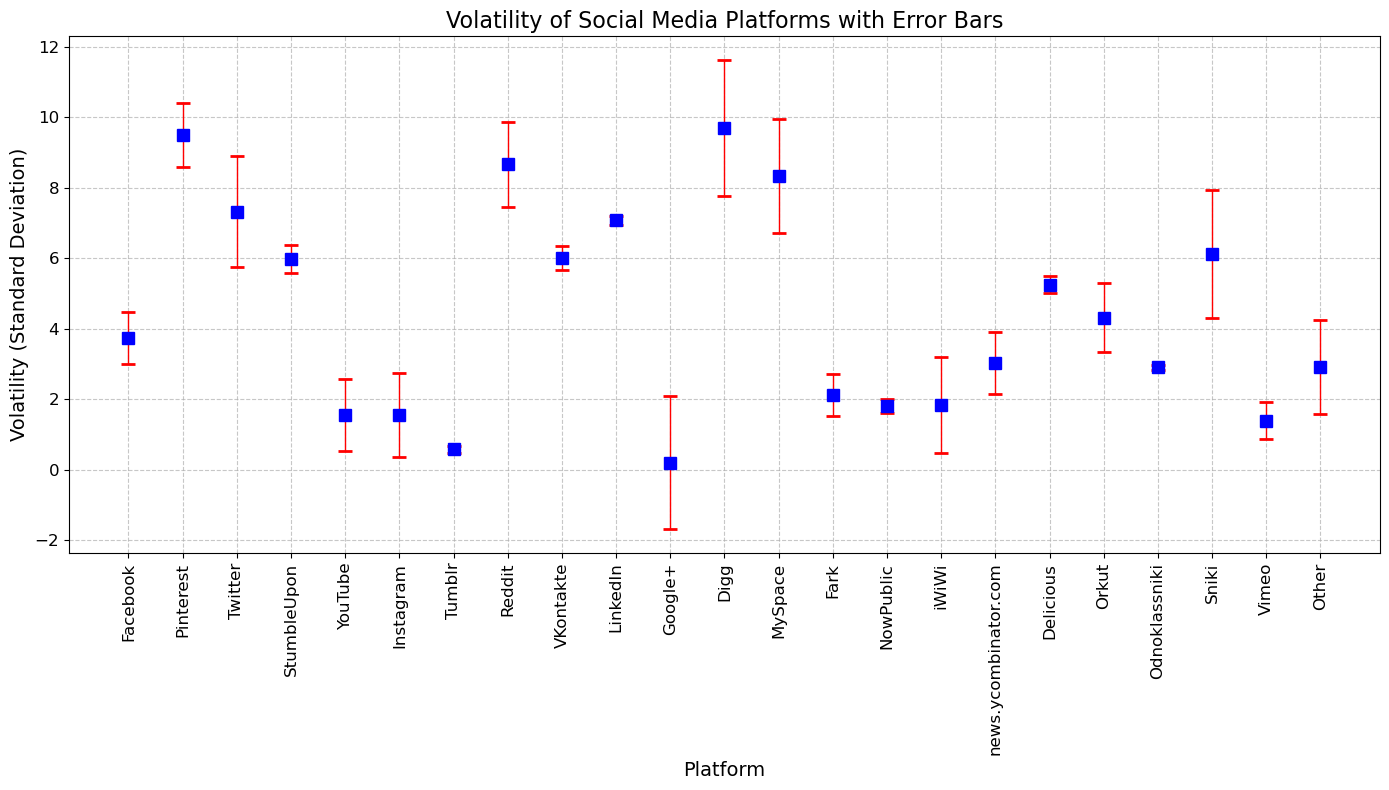

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data loading code)
platforms = [
    'Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'YouTube', 'Instagram',
    'Tumblr', 'Reddit', 'VKontakte', 'LinkedIn', 'Google+', 'Digg', 'MySpace',
    'Fark', 'NowPublic', 'iWiWi', 'news.ycombinator.com', 'Delicious', 'Orkut',
    'Odnoklassniki', 'Sniki', 'Vimeo', 'Other'
]

# Simulate volatility data (standard deviation) and standard errors
np.random.seed(42)
volatilities = np.random.rand(len(platforms)) * 10  # Simulated volatility values
std_errors = np.random.rand(len(platforms)) * 2     # Simulated standard errors

# Create the error bars plot
plt.figure(figsize=(14, 8))
plt.errorbar(platforms, volatilities, yerr=std_errors, fmt='o', ecolor='red', capsize=5, capthick=2, elinewidth=1, marker='s', markersize=8, linestyle='None', color='blue')

# Add labels and title
plt.title('Volatility of Social Media Platforms with Error Bars', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Volatility (Standard Deviation)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

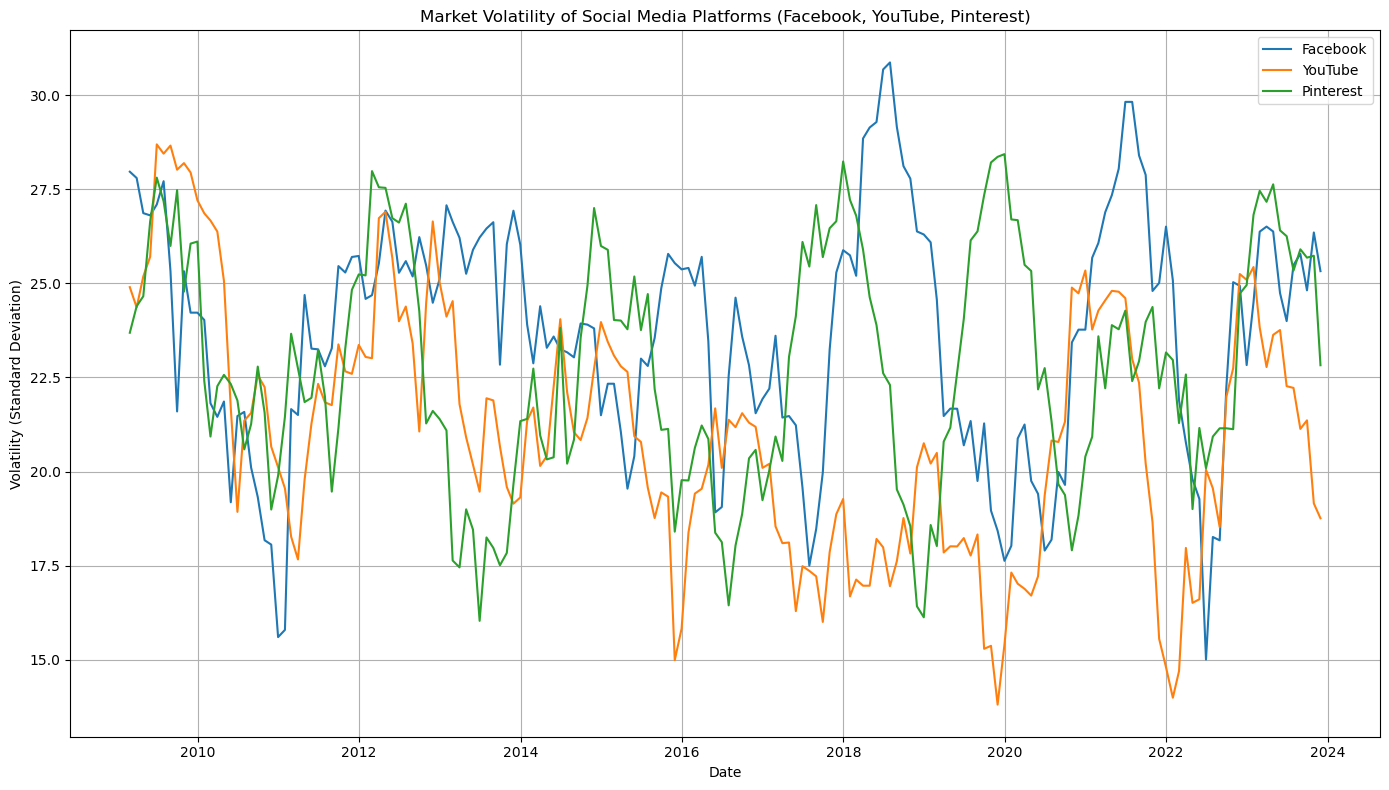

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example dataset creation (replace this with your actual dataset loading code)
# Generate example market share data for illustration
dates = pd.date_range(start='2008-03-01', end='2023-12-01', freq='M')
platforms = ['Facebook', 'YouTube', 'Pinterest']
np.random.seed(42)

# Simulated market share data (replace with your actual data)
data = {
    'Date': np.tile(dates, len(platforms)),
    'Platform': np.repeat(platforms, len(dates)),
    'Market Share': np.random.randint(10, 90, size=len(dates) * len(platforms))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate rolling volatility (standard deviation) for each platform
window_size = 12  # Example: 12 months rolling window
volatility_df = df.pivot(index='Date', columns='Platform', values='Market Share').rolling(window=window_size).std()

# Plot the volatility for each platform
plt.figure(figsize=(14, 8))

for platform in platforms:
    plt.plot(volatility_df.index, volatility_df[platform], label=platform)

plt.title('Market Volatility of Social Media Platforms (Facebook, YouTube, Pinterest)')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('volatility_line_graph.png')

# Show the plot
plt.show()